In [1]:
# ============================================================
# STUDENT PERFORMANCE PREDICTION USING ML (FINAL – STABLE)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

sns.set(style="whitegrid")

In [4]:
# ============================================================
# 1. LOAD DATA
# ============================================================
df = pd.read_csv("python_project.csv")
df.columns = df.columns.str.strip()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Age                                   802 non-null    object
 1   Gender                                802 non-null    object
 2   Year of study                         802 non-null    object
 3   CGPA                                  801 non-null    object
 4   daily study hours                     802 non-null    object
 5   Consistency                           802 non-null    int64 
 6   which AI tool                         802 non-null    object
 7   Ai tool per week usuage               802 non-null    object
 8   purpose of AI                         802 non-null    object
 9   dependency on AI tool                 802 non-null    int64 
 10  trust on AI tool                      802 non-null    int64 
 11  marks improved or not           

,Consistency,dependency on AI tool,trust on AI tool,Confidence level,stress level,learning efficiency
count,802.000000,802.000000,802.000000,802.000000,802.0000,802.000000
mean,5.612219,5.153367,5.607232,5.568579,4.9202,5.842893
std,2.651266,2.842107,2.831797,2.785446,2.7801,2.949895
min,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,3.0000,4.000000
50%,6.000000,5.000000,6.000000,6.000000,5.0000,6.000000
75%,8.000000,7.750000,8.000000,8.000000,7.0000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000


In [5]:
# ============================================================
# 2. TARGET VARIABLE (HIGH PERFORMER)
# ============================================================
df["CGPA"] = pd.to_numeric(df["CGPA"], errors="coerce")
df.dropna(subset=["CGPA"], inplace=True)
df["CGPA"] = df["CGPA"].clip(0, 10)

df["High_Performer"] = (df["CGPA"] >= 8.5).astype(int)

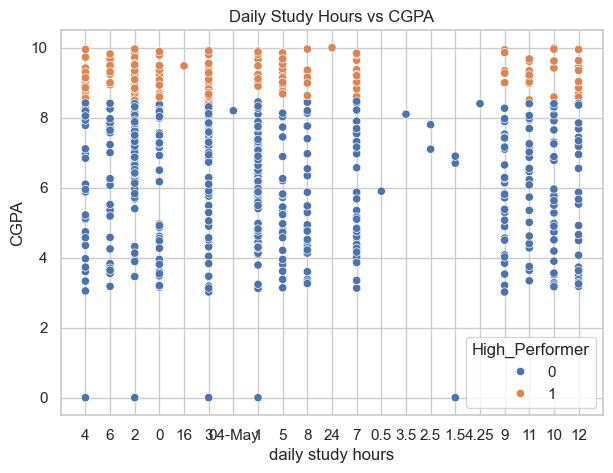

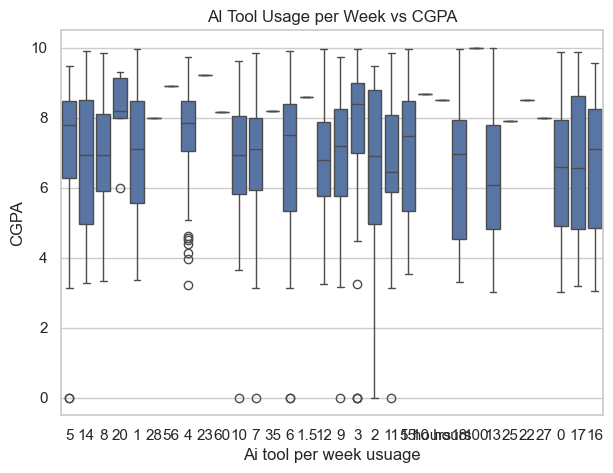

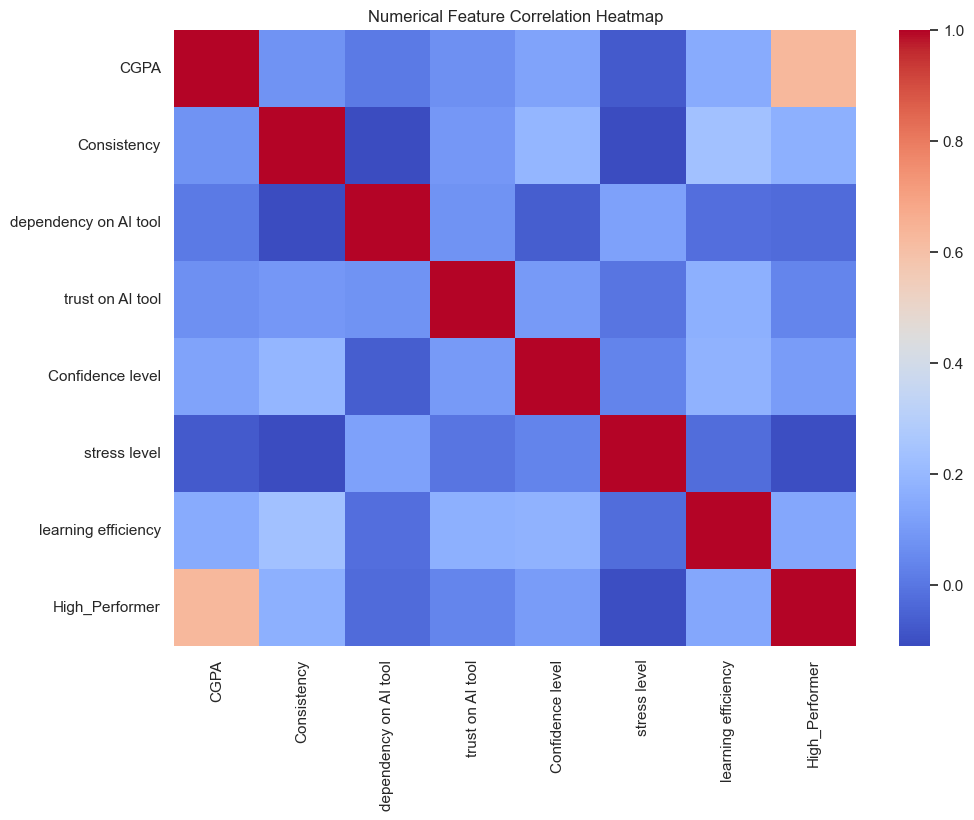

In [6]:
# ============================================================
# 3. EXPLORATORY DATA VISUALIZATIONS
# ============================================================

# Daily Study Hours vs CGPA
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="daily study hours",
    y="CGPA",
    hue="High_Performer",
    data=df
)
plt.title("Daily Study Hours vs CGPA")
plt.show()

# AI Tool Usage per Week vs CGPA
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Ai tool per week usuage",
    y="CGPA",
    data=df
)
plt.title("AI Tool Usage per Week vs CGPA")
plt.show()


# Correlation Heatmap
plt.figure(figsize=(11,8))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Numerical Feature Correlation Heatmap")
plt.show()

In [7]:
# ============================================================
# 4. ENCODE CATEGORICAL FEATURES
# ============================================================
le = LabelEncoder()
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [8]:
# ============================================================
# 5. FEATURES & TARGET
# ============================================================
X = df.drop(["CGPA", "High_Performer"], axis=1)
y = df["High_Performer"]

In [9]:
# ============================================================
# 6. TRAIN-TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [10]:
# ============================================================
# 7. SCALING
# ============================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# ============================================================
# 8. MODEL EVALUATION FUNCTION
# ============================================================
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)

    print(f"\n{name}")
    print("Accuracy :", acc)
    print("Precision:", precision_score(y_test, preds))
    print("Recall   :", recall_score(y_test, preds))
    print("F1 Score :", f1_score(y_test, preds))

    ConfusionMatrixDisplay.from_predictions(
        y_test, preds,
        display_labels=["Not Top", "Top Performer"],
        cmap="Blues"
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    return acc


In [12]:
# ============================================================
# 9. MODELS
# ============================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=11),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=6,
        min_samples_leaf=5,
        random_state=42
    ),
    "SVM": SVC(kernel="rbf", C=3, gamma="scale"),
    "Random Forest": RandomForestClassifier(
        n_estimators=500,
        max_depth=14,
        min_samples_leaf=2,
        random_state=42
    )
}


Logistic Regression
Accuracy : 0.7938144329896907
Precision: 0.8888888888888888
Recall   : 0.1702127659574468
F1 Score : 0.2857142857142857


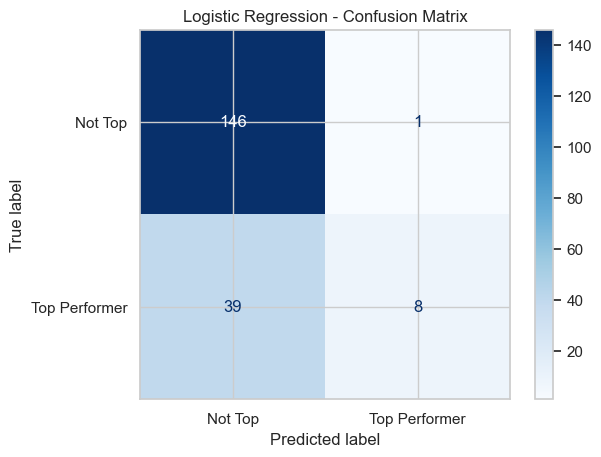


KNN
Accuracy : 0.8041237113402062
Precision: 0.7368421052631579
Recall   : 0.2978723404255319
F1 Score : 0.42424242424242425


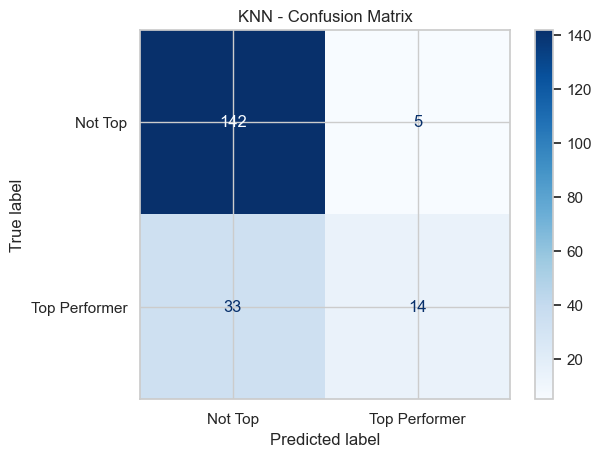


Naive Bayes
Accuracy : 0.7525773195876289
Precision: 0.48484848484848486
Recall   : 0.3404255319148936
F1 Score : 0.4


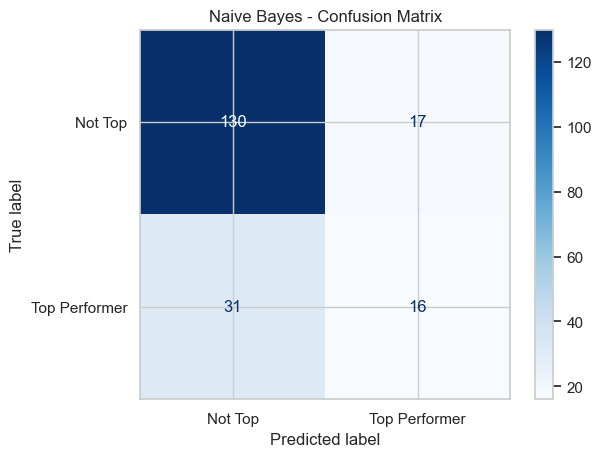


Decision Tree
Accuracy : 0.654639175257732
Precision: 0.3148148148148148
Recall   : 0.3617021276595745
F1 Score : 0.33663366336633666


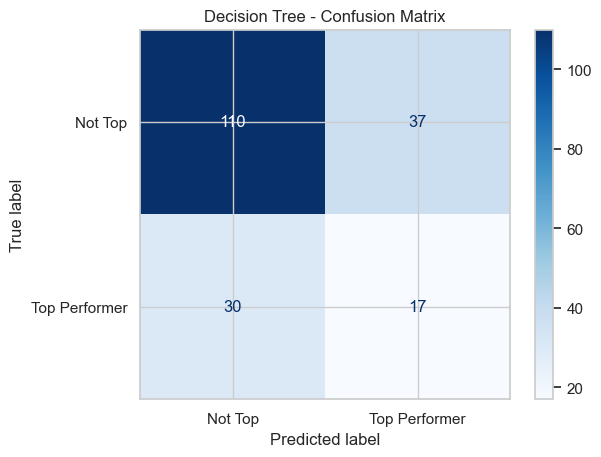


SVM
Accuracy : 0.7422680412371134
Precision: 0.4482758620689655
Recall   : 0.2765957446808511
F1 Score : 0.34210526315789475


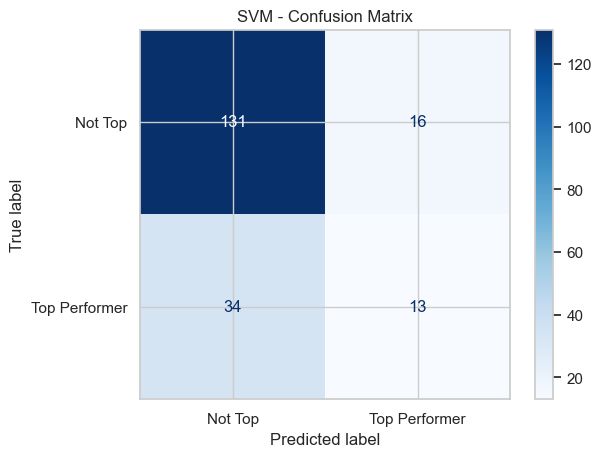


Random Forest
Accuracy : 0.7989690721649485
Precision: 0.8333333333333334
Recall   : 0.2127659574468085
F1 Score : 0.3389830508474576


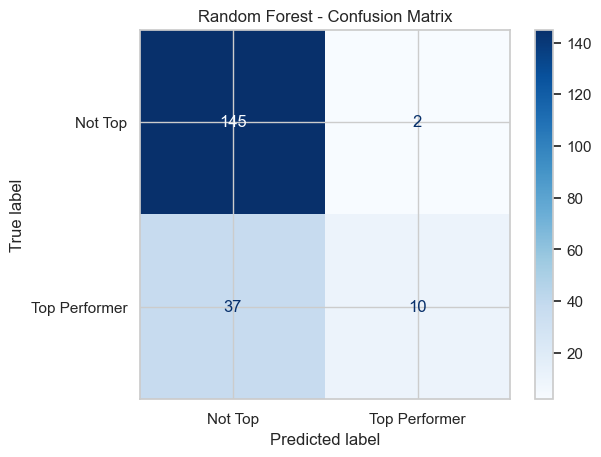

In [13]:
# ============================================================
# 10. TRAIN & EVALUATE ALL MODELS
# ============================================================
acc_results = {}

for name, model in models.items():
    acc_results[name] = evaluate_model(model, name)

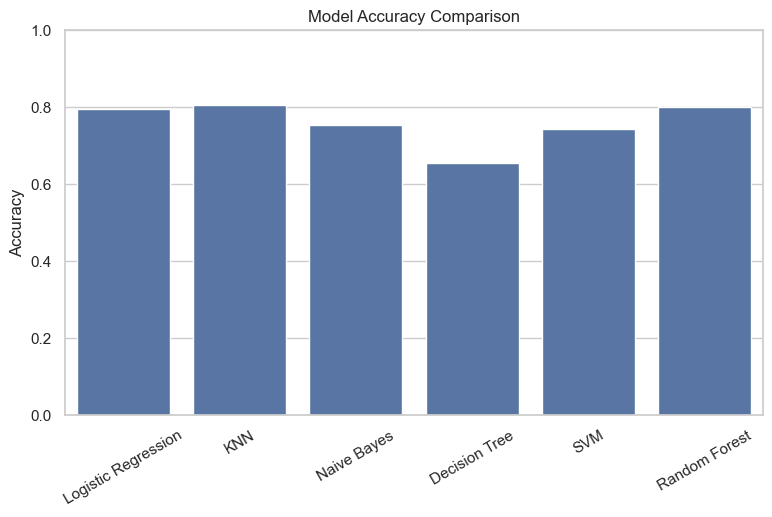

In [14]:
# ============================================================
# 11. ACCURACY COMPARISON
# ============================================================
plt.figure(figsize=(9,5))
sns.barplot(x=list(acc_results.keys()), y=list(acc_results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=30)
plt.show()


In [15]:
# ============================================================
# 12. BEST MODEL SELECTION (CORRECT)
# ============================================================
best_model_name = max(acc_results, key=acc_results.get)
best_model = models[best_model_name]
best_preds = best_model.predict(X_test)

print("\n====== BEST MODEL ======")
print("Model   :", best_model_name)
print("Accuracy:", acc_results[best_model_name])

print("\nClassification Report:\n")
print(classification_report(y_test, best_preds))


====== BEST MODEL ======
Model   : KNN
Accuracy: 0.8041237113402062

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       147
           1       0.74      0.30      0.42        47

    accuracy                           0.80       194
   macro avg       0.77      0.63      0.65       194
weighted avg       0.79      0.80      0.77       194



In [16]:
# ============================================================
# 13. FEATURE IMPORTANCE (ONLY IF SUPPORTED)
# ============================================================
if hasattr(best_model, "feature_importances_"):
    imp_df = pd.DataFrame({
        "Feature": X.columns,
        "Importance": best_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8,6))
    sns.barplot(x="Importance", y="Feature", data=imp_df.head(10))
    plt.title(f"Top 10 Important Features ({best_model_name})")
    plt.show()
else:
    print(f"{best_model_name} does NOT support feature importance.")


KNN does NOT support feature importance.


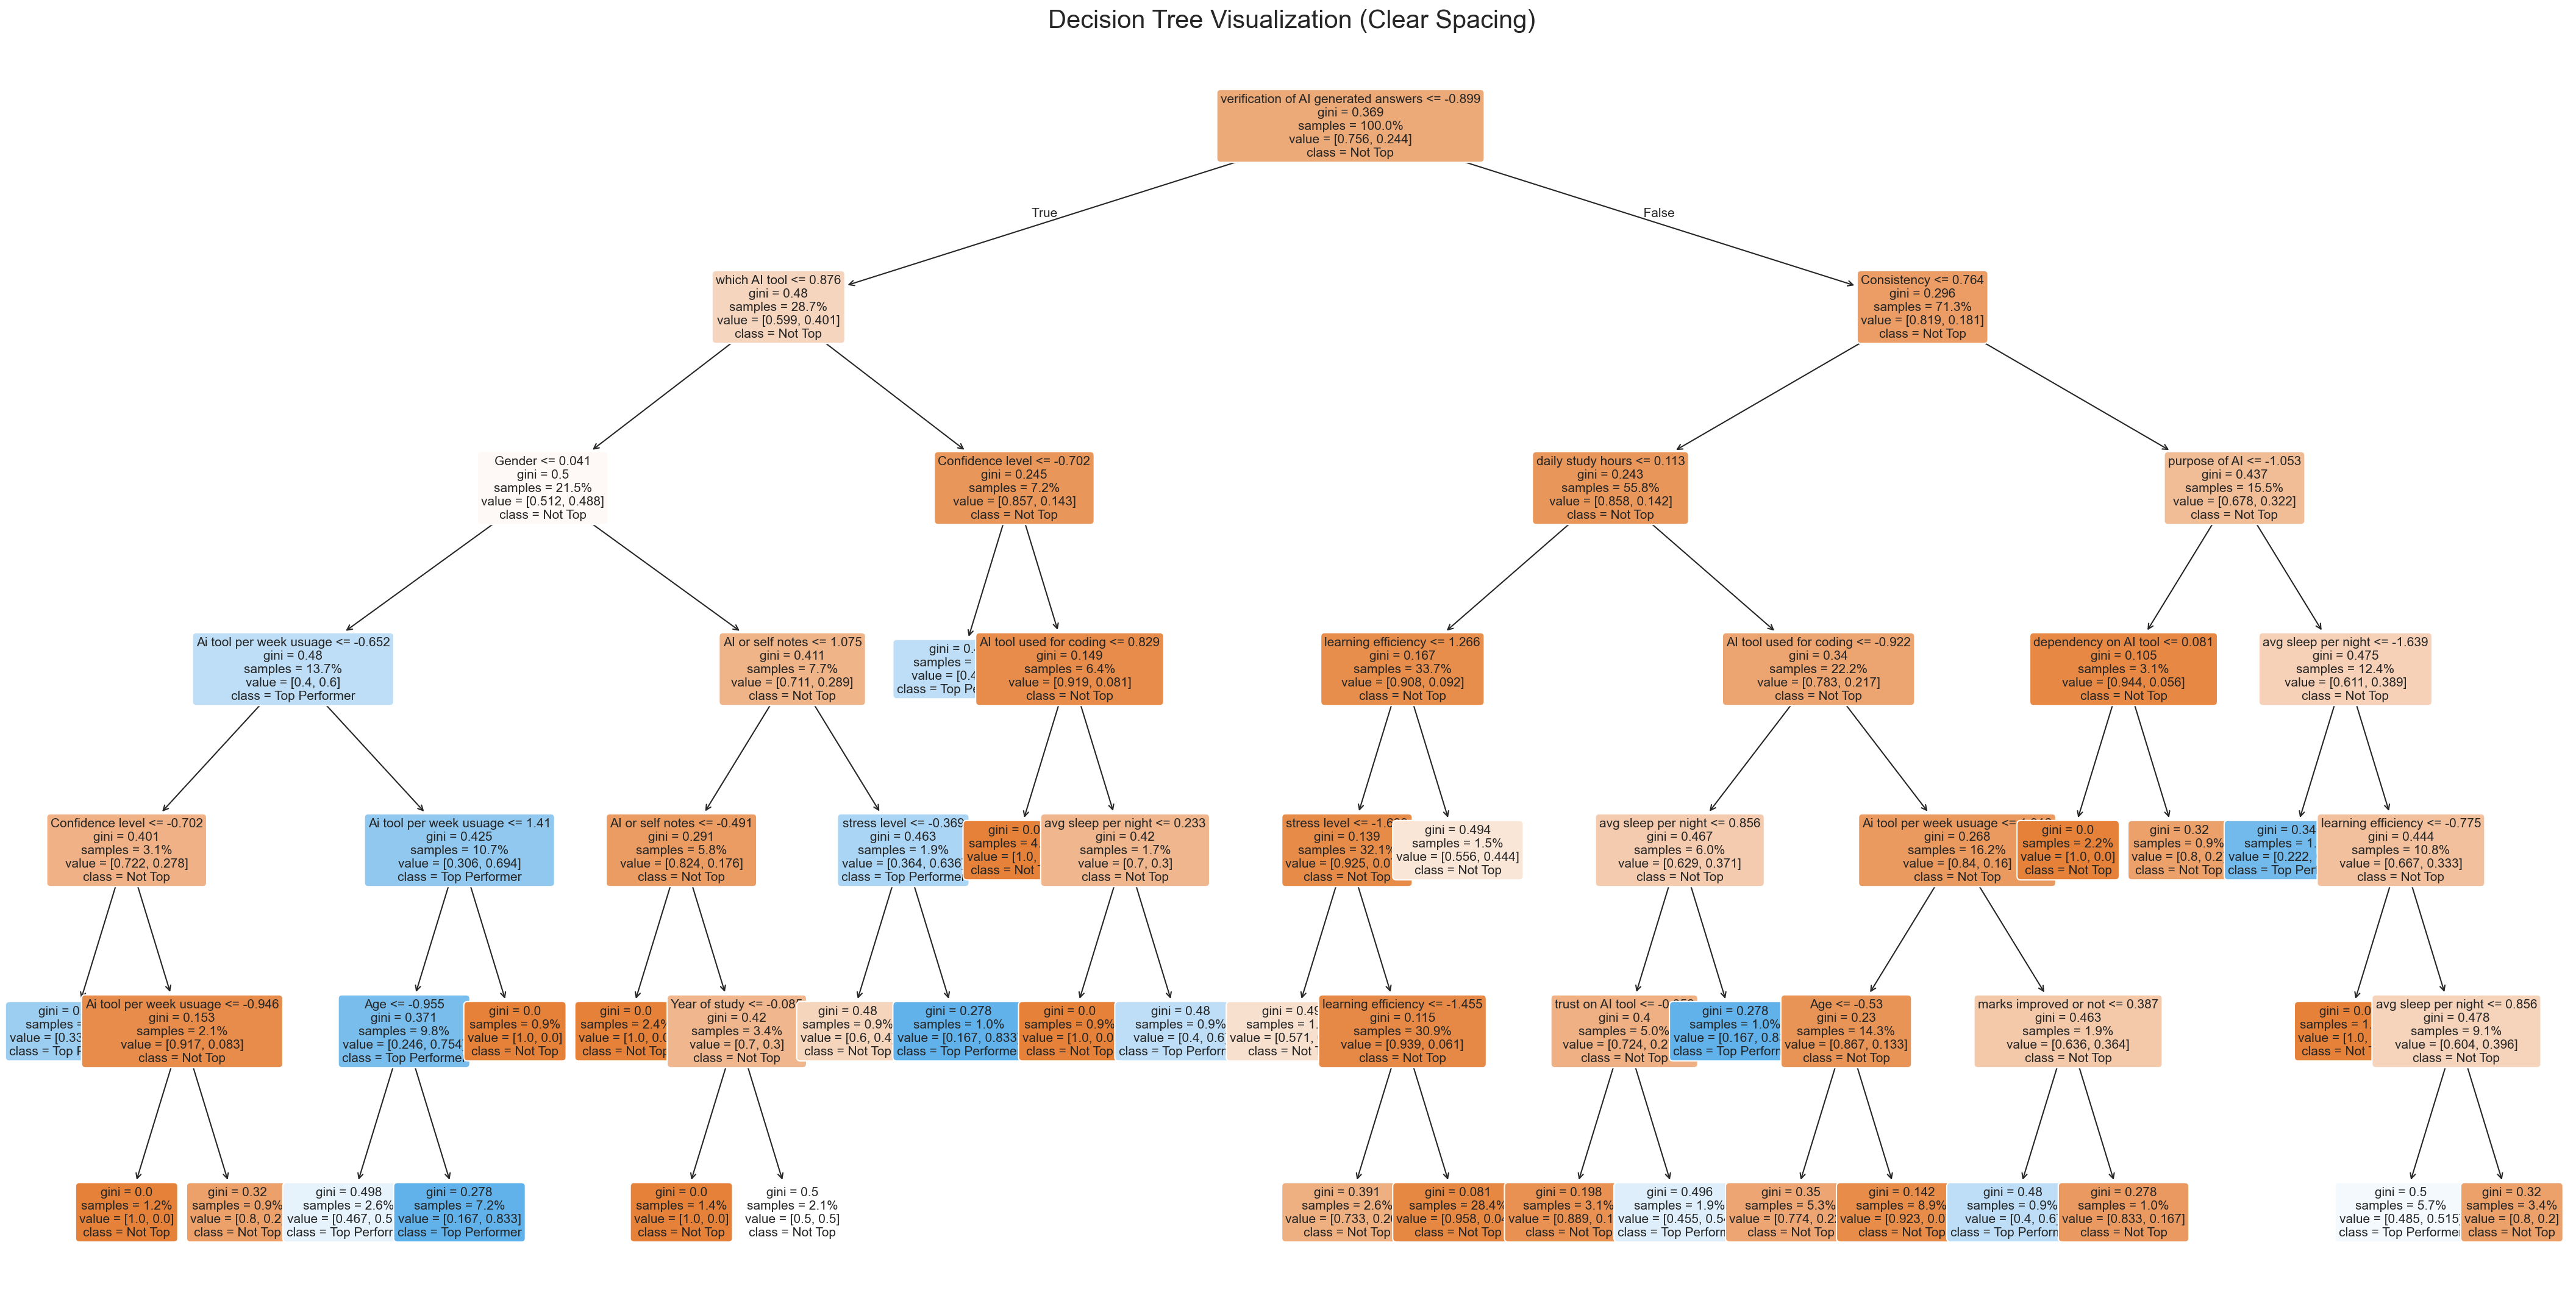

In [17]:
# ============================================================
# 14. DECISION TREE VISUALIZATION (CLEAR)
# ============================================================
tree_model = models["Decision Tree"]

plt.figure(figsize=(36,18), dpi=150)
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["Not Top", "Top Performer"],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True
)
plt.title("Decision Tree Visualization (Clear Spacing)", fontsize=20)
plt.show()

In [18]:
# ============================================================
# 15. MODEL ACCURACY LIST (FOR REPORT)
# ============================================================
print("\nModel Accuracies:")
for model, acc in acc_results.items():
    print(f"{model}: {acc*100:.2f}%")


Model Accuracies:
Logistic Regression: 79.38%
KNN: 80.41%
Naive Bayes: 75.26%
Decision Tree: 65.46%
SVM: 74.23%
Random Forest: 79.90%
